<a href="https://colab.research.google.com/github/cuoicungtui/ML/blob/master/Quoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [3]:
!pip install tensorflow-gpu==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
pwd

'/content'

In [6]:
cd /content/gdrive/MyDrive/Colab Notebooks/ML

/content/gdrive/MyDrive/Colab Notebooks/ML


In [7]:
pwd


'/content/gdrive/MyDrive/Colab Notebooks/ML'

In [8]:
ls


 Quoc.ipynb  'traffic-signs-data (1).zip'   train.p
 test.p       traffic-signs-data.zip        valid.p


In [9]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

link dataset


In [10]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import wget

In [12]:
#wget.download(link)

In [13]:
data = './'

In [14]:
#!unzip -q traffic-signs-data.zip -d $data

In [15]:
valid_link = data+"valid.p"
test_link = data+"test.p"
train_link = data+"train.p"

In [16]:
import pickle

thu vien doc file

In [17]:
with open(train_link,mode = 'rb') as f:
  train = pickle.load(f)

In [18]:
with open(valid_link,mode = 'rb') as f:
  valid = pickle.load(f)

In [19]:
with open(test_link,mode = 'rb') as f:
  test = pickle.load(f)

In [20]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [21]:
trainX = train["features"]
trainY = train["labels"]
trainX
trainY

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [22]:
trainX.shape

(34799, 32, 32, 3)

34799 features  matrix 32x32 3 class

In [23]:
trainX[0].shape

(32, 32, 3)

In [24]:
import matplotlib.pyplot as plt


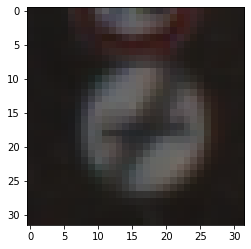

In [25]:
plt.imshow(trainX[0])

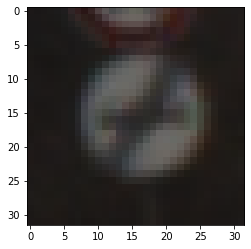

In [26]:
plt.imshow(trainX[1])

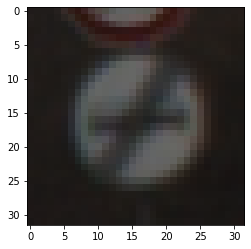

In [27]:
plt.imshow(trainX[10])

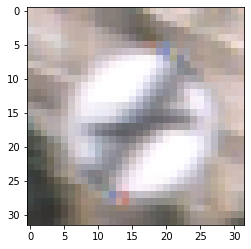

In [28]:
plt.imshow(trainX[50])

In [29]:
trainY[50]

41

In [30]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [31]:
classNames[trainY[50]]

'End of no passing'

cac feature dang sap theo thu tu lien nhau, trao feature an lable

In [32]:
from sklearn.utils import shuffle

In [33]:
trainX,trainY = shuffle(trainX,trainY)

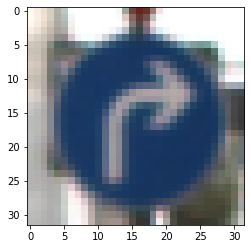

In [34]:
plt.imshow(trainX[0])

In [35]:
classNames[trainY[0]]

'Turn right ahead'

In [36]:
validX = valid["features"]
validY = valid["labels"]


In [37]:
testX = test["features"]
testY = test["labels"]

chuan hoa ve 0->1

In [38]:
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0


In [39]:
trainX[0]

array([[[0.99215686, 0.97647059, 0.94117647],
        [0.97647059, 0.9254902 , 0.88235294],
        [0.91764706, 0.87843137, 0.82352941],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99215686, 0.98431373, 0.95686275],
        [0.97254902, 0.93333333, 0.89411765],
        [0.9372549 , 0.88627451, 0.83529412],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.96862745, 0.93333333],
        [0.97254902, 0.91764706, 0.8745098 ],
        [0.91372549, 0.8627451 , 0.80784314],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.75294118, 0.75294118, 0.74901961],
        [0.7372549 , 0.74117647, 0.7372549 ],
        [0.7254902 , 0

chuan hoa label

In [40]:
from sklearn.preprocessing import LabelBinarizer

In [41]:
lb = LabelBinarizer()

In [42]:
trainY = lb.fit_transform(trainY)

In [43]:
validY = lb.fit_transform(validY)

In [44]:
valid['labels']

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [45]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

BatchNormalization chuan hoa
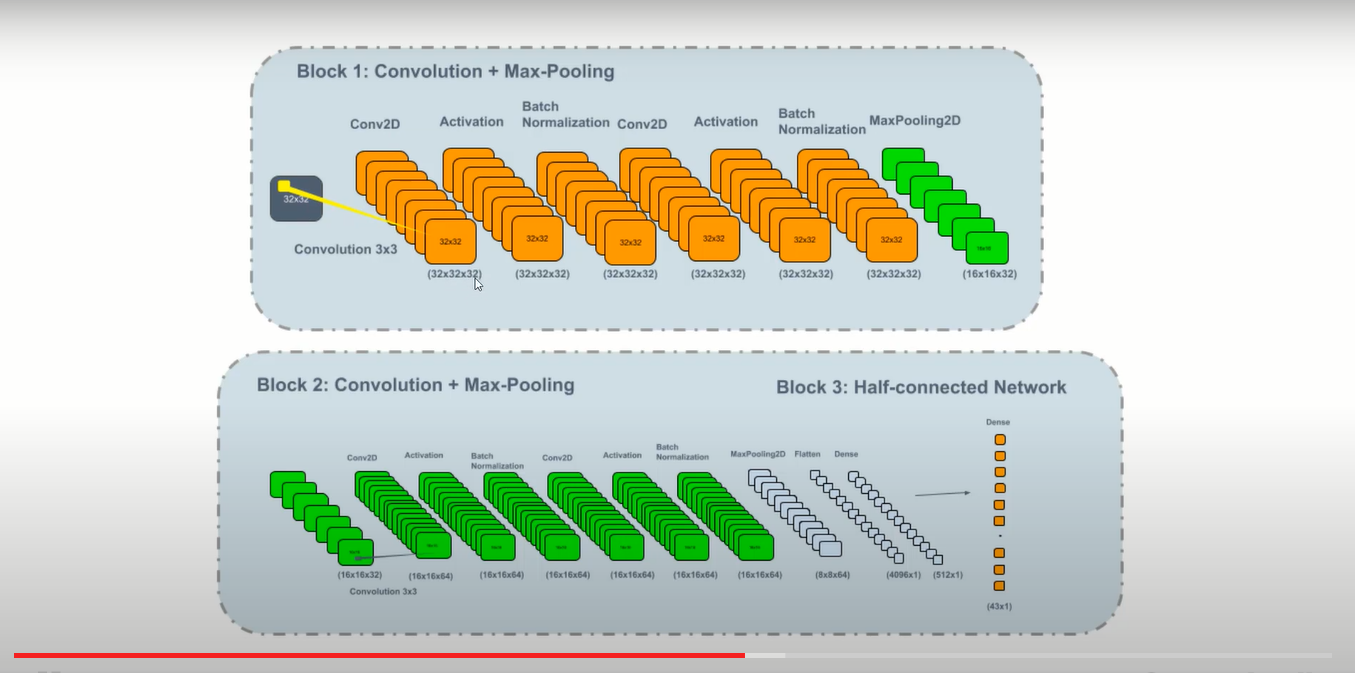

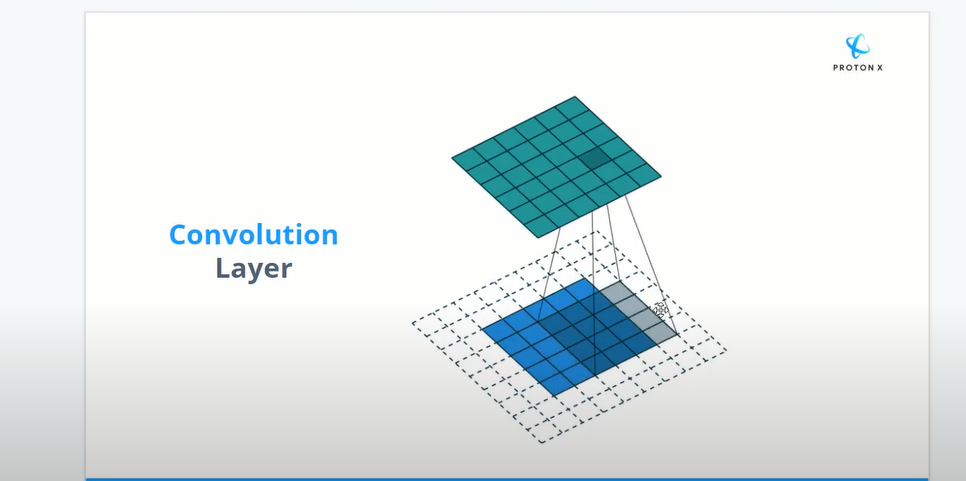

tu ho ra matran tich chap

In [47]:
model = Sequential()

khoi tao model

In [48]:
width = 32
height = 32
classes = 43


In [49]:
shape = (width,height,3)

In [50]:
model.add(Conv2D(32,(3,3),padding="same",input_shape = shape))

dung 32 conv2D 3x3
padding = same du nguyen canh anh

In [51]:
model.add(Activation("relu"))

In [52]:
model.add(BatchNormalization())

chuan hoa phan bo

In [53]:
model.add(Conv2D(32,(3,3),padding="same"))


In [54]:
model.add(Activation("relu"))

In [55]:
model.add(BatchNormalization())

In [56]:
model.add(MaxPooling2D(pool_size=(2,2)))

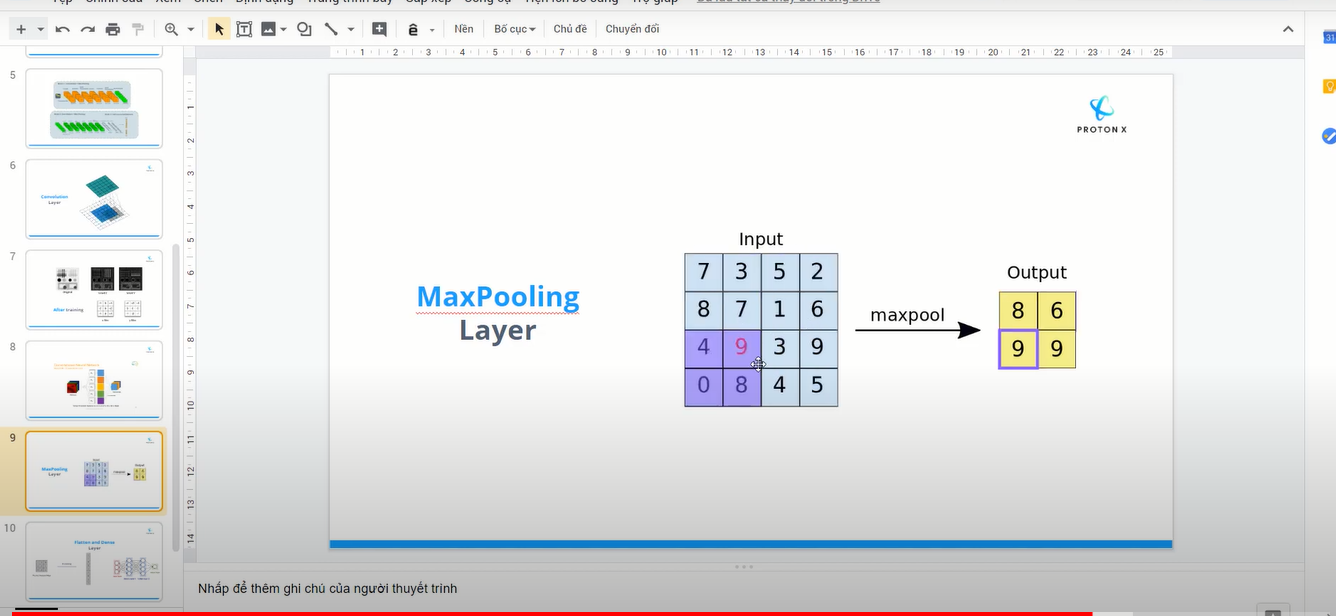

loc max

In [57]:
model.add(Conv2D(64,(3,3),padding="same"))

In [58]:
model.add(Activation("relu"))

In [59]:
model.add(BatchNormalization())

In [60]:
model.add(Conv2D(64,(3,3),padding="same"))

In [61]:
model.add(Activation("relu"))

In [62]:
model.add(BatchNormalization())

In [63]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [64]:
model.add(Flatten())

duoi ma tran ra ngang

In [65]:
8*8*64

4096

In [66]:
model.add(Dense(512))

chuyen 4096 xuong 512

In [67]:
model.add(Activation("relu"))

In [68]:
model.add(BatchNormalization())

In [69]:
model.add(Dense(classes))

In [70]:
model.add(Activation("softmax"))

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

none  so luong anh
param so luong can hoc

In [72]:
aug = ImageDataGenerator(rotation_range=0.15,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip = True)

In [73]:
learning_rate = 0.01

toc do hoc cao qua ko dung kip
thap qua cham

In [74]:
epochs = 10
#epochs
#step
batch_size =64

In [75]:
opt = SGD(learning_rate= learning_rate,momentum=0.9)

In [77]:
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [78]:
print("Start train")
H = model.fit_generator(aug.flow(trainX,trainY,batch_size = batch_size) , validation_data=(validX,validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose = 1)
#H = model.fit(trainX,trainY,batch_size = batch_size,validation_data=(validX,validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose = 1)
#H = model.fit(aug.flow(trainX,trainY,batch_size = batch_size,validation_data=(validX,validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose = 1)

Start train
Epoch 1/10
543/543 [==============================] - 368s 678ms/step - loss: 2.0599 - accuracy: 0.4111 - val_loss: 2.7002 - val_accuracy: 0.3565
Epoch 2/10
543/543 [==============================] - 367s 676ms/step - loss: 0.8262 - accuracy: 0.7262 - val_loss: 1.2545 - val_accuracy: 0.6327
Epoch 3/10
543/543 [==============================] - 372s 686ms/step - loss: 0.4025 - accuracy: 0.8688 - val_loss: 1.7856 - val_accuracy: 0.6193
Epoch 4/10
543/543 [==============================] - 369s 679ms/step - loss: 0.2261 - accuracy: 0.9271 - val_loss: 0.6080 - val_accuracy: 0.8367
Epoch 5/10
543/543 [==============================] - 377s 695ms/step - loss: 0.1529 - accuracy: 0.9503 - val_loss: 0.6120 - val_accuracy: 0.8465
Epoch 6/10
543/543 [==============================] - 382s 703ms/step - loss: 0.1087 - accuracy: 0.9650 - val_loss: 0.5653 - val_accuracy: 0.8535
Epoch 7/10
543/543 [==============================] - 379s 699ms/step - loss: 0.0922 - accuracy: 0.9710 - val_lo

In [79]:
model.save("quoc.h5")

In [97]:
result =  model.predict(testX[4:5])

In [86]:
result

array([[6.9252405e-07, 9.9992514e-01, 2.3367114e-08, 4.2440121e-10,
        8.2396866e-08, 1.0447211e-08, 6.9651733e-09, 1.0307719e-10,
        5.1878828e-11, 1.1347940e-11, 3.3046252e-12, 2.4017188e-10,
        7.5676604e-10, 3.5345036e-11, 5.9053129e-10, 6.5934208e-10,
        2.0023612e-09, 2.6145527e-12, 7.0498725e-05, 2.3090740e-08,
        3.2605623e-11, 4.6072973e-10, 1.3615196e-10, 4.0584289e-12,
        2.2715089e-06, 2.8954941e-11, 1.0604032e-10, 6.6276442e-09,
        9.7445513e-07, 8.5891845e-09, 3.7019205e-13, 2.0895409e-10,
        2.9621175e-08, 1.8011156e-09, 7.7523549e-10, 3.5707135e-08,
        2.6676823e-08, 5.1482843e-08, 1.9019364e-09, 1.1671830e-09,
        6.5262982e-09, 2.6219678e-09, 4.5001919e-10]], dtype=float32)

In [98]:
import numpy as np

In [100]:
final = np.argmax(result)

In [101]:
final = classNames[final]

In [102]:
final

'Right-of-way at the next intersection'

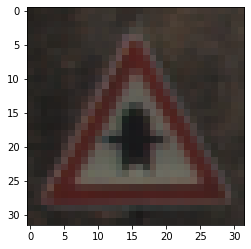

In [105]:
plt.imshow(test["features"][4])